# 0. Installs, Imports and API Keys

In [ ]:
# RUN THIS CELL FIRST!
!pip install -q pypdf pandas matplotlib tiktoken textract transformers faiss-cpu
#langchain==0.0.150

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 10.4 MB

In [ ]:
!pip install openai==0.28.1 langchain==0.0.316

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.9 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

In [ ]:
os.environ["OPENAI_API_KEY"] = ""

# 1. Loading PDFs and chunking with LangChain

In [ ]:
# You MUST add your PDF to local files in this notebook (folder icon on left hand side of screen)

# Simple method - Split by pages
loader = PyPDFLoader("./LGf.pdf")
pages = loader.load_and_split()
print(pages[0])

# SKIP TO STEP 2 IF YOU'RE USING THIS METHOD
chunks = pages

page_content='CAUTION\nBEFORE SERVICING THE UNIT, READ THE SAFETY PRECAUTIONS IN THIS MANUAL.REFRIGERATORSERVICE MANUAL\nLRFC25750COLOR  COLOR: WESTERN BLACK\n TITANIUMhttp://biz.lgservice.com\nMODEL:LRFC25750ST\nLRFC21755SB\nLRFC21755ST  STAINLESS-STEEL\nLRFC21755TT' metadata={'source': './LGf.pdf', 'page': 0}


In [ ]:
# Advanced method - Split by chunk

# Step 1: Convert PDF to text
import textract
doc = textract.process("././LGf.pdf")

# Step 2: Save to .txt and reopen (helps prevent issues)
with open('./LGf.pdf', 'w') as f:
    f.write(doc.decode('utf-8'))

with open('./LGf.pdf', 'r') as f:
    text = f.read()

# Step 3: Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# Step 4: Split text into chunks
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 512,
    chunk_overlap  = 24,
    length_function = count_tokens,
)

chunks = text_splitter.create_documents([text])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
# Result is many LangChain 'Documents' around 500 tokens or less (Recursive splitter sometimes allows more tokens to retain context)
type(chunks[0])

langchain.schema.document.Document

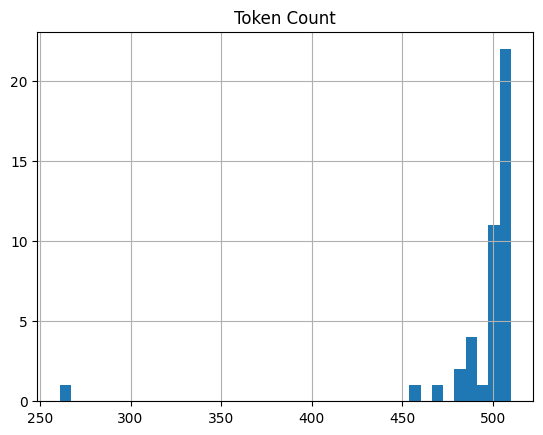

In [ ]:
# Quick data visualization to ensure chunking was successful

# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
df.hist(bins=40, )

# Show the plot
plt.show()

# 2. Embed text and store embeddings

In [ ]:
# Get embedding model
embeddings = OpenAIEmbeddings()

# Create vector database
db = FAISS.from_documents(chunks, embeddings)

# 3. Setup retrieval function

In [ ]:
# Check similarity search is working
query = "the cooling is down"
docs = db.similarity_search(query)
docs[0]

Document(page_content="Equal to ambient\ntemperature.\n\nREMARKS\n\n• Refrigerant level is low due \n• to a leak.\n• Normal cooling is possible by \n• restoring the normal amount of \n• refrigerant and repairing the leak.\n\n• No discharging of Refrigerant.\n• Normal cooling is possible by \n• restoring the normal amount of \n• refrigerant and repairing the leak.\n\nPARTIAL\nCLOG\n\nFlowing sound of refrigerant\nis heard and frost forms\nin inlet only.\n\nA little higher\nthan ambient \ntemperature.\n\n• Normal discharging of the\n• refrigerant.\n• The capillary tube is faulty.\n\ncompartment and\nRefrigerator don't \ncool normally.\n\nFreezer \ncompartment and\nRefrigerator don't \ncool normally.\n\nWHOLE\nCLOG\n\nFreezer \ncompartment and \nRefrigerator don't cool.\n\nFlowing sound of refrigerant\nis not heard and frost isn't\nformed.\n\nMOISTURE\nCLOG\n\nCooling operation\nstops periodically.\n\nFlowing sound of refrigerant\nis not heard and frost melts.\n\nCOMP-\nRESSION\n\nFreezer

In [ ]:
# Create QA chain to integrate similarity search with user queries (answer query from knowledge base)

# chain = load_qa_chain(OpenAI(temperature=0), chain_type="stuff")
chain = load_qa_chain(OpenAI(temperature=0, model="gpt-3.5-turbo-instruct"), chain_type="stuff")

query = "why is it leaking water ?"
docs = db.similarity_search(query)

chain.run(input_documents=docs, question=query)

" I don't know. This information does not provide any context or information about the specific situation or problem. It only provides general information about the operation and troubleshooting of a refrigerator. More information is needed to accurately diagnose and address the issue of water leakage."

# 5. Create chatbot with chat memory (OPTIONAL)

In [ ]:
from IPython.display import display
import ipywidgets as widgets

# Create conversation chain that uses our vectordb as retriver, this also allows for chat history management
qa = ConversationalRetrievalChain.from_llm(OpenAI(temperature=0.1), db.as_retriever())

In [ ]:
chat_history = []

def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thank you for using the State of the Union chatbot!")
        return

    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))

    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="blue">Chatbot:</font></b> {result["answer"]}'))

print("Welcome to the SERVE-us chatbot! Type 'exit' to stop.")

input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)

Welcome to the SERVE-us chatbot! Type 'exit' to stop.


Text(value='', placeholder='Please enter your question:')

InvalidRequestError: The model `text-davinci-003` has been deprecated, learn more here: https://platform.openai.com/docs/deprecations